In [1]:
#goal to improve simulator!
    #create a path rather than a origin only
    #what is energy and what do I use it for?
    #what do i use time for?
    #gaussian distribution of the errors
    #histogram of the errors
    #principle of occam's razor
    #Do morethan a point source
    #create a line!
    
    #create an ROC curve of performace as gaussian noise is added!
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt
import random 
import tensorflow as tf
import numpy as np
import math

/Users/mohammfa/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#find all values greater than a certain value
def findGreater(mat,val):
    arr = np.array([])
    for i in range(mat.shape[0]): #xaxis
        for j in range(mat.shape[1]): #yaxix
            if(mat[i,j] > val):
                arr = np.append(arr,mat[i,j])
                
    return arr

In [3]:
def pointSlopeForm(angle,x,y):
    #find the eqn of the line: 
    slope = math.atan(angle)
    #y = mx + b
    intercept = y - (slope * x)
    #ax + by + c =0 == y - mx - b = 0
    a = -slope
    b = 1
    c = intercept
    return a,b,c

In [4]:
def minDistToLine(a,b,c,point_x,point_y):
    #distance = |ax0 + by0 + c| / sqrt(a^2 + b^2)
    top = abs(a(point_x) + b(point_y) + c)
    bottom = math.sqrt(pow(a,2)+pow(b,2))
    return top/bottom

In [5]:
"""Def Generate neutrino 
Random origin (x,y)
Random direction (dx, dy) or (one angles)
Random energy (0 to 1) or (10 to 300 nanoseconds)
Random time
(make code adjustable)
We want to know how fast the neutrino is"""
def generateNeutrino():
    x = random.uniform(0,10)
    y = random.uniform(0,10)
    angle = random.vonmisesvariate(0, 0)
    energy = random.random();
    time = random.randint(10,300)

    return x, y, angle, energy, time

In [6]:
def generateSignal(x,y,angle,energy,time, noise, sigma):
    nodes = 10
    x_arr = np.linspace(0,nodes,nodes + 1)
    y_arr = np.linspace(0,nodes,nodes + 1)
    #10 by 10 grid which is the VICE CUBE
    
    #using MeshGrid
    mesh_x, mesh_y = np.meshgrid(x_arr, y_arr)
    
    a,b,c = pointSlopeForm(angle,x,y)
    #to find the distance from the point to a line I used the line to distance forumula
    x_sq = mesh_x - x
    y_sq = mesh_y - y
    x_sq = np.power(x_sq,2)
    y_sq = np.power(y_sq,2)
    distance = np.sqrt(x_sq + y_sq)
    
    #find charge
    #charge formula: C = (maxDistance - distance_to_each_node)^2 / maxDistance
    maxDistance = math.sqrt((nodes * nodes) + (nodes * nodes))
    charge = np.power((maxDistance - distance),2) / pow(maxDistance,2)
    
    if(noise == True):
        noise = np.random.normal(0,sigma,[11,11])
        #print(noise)
        charge = charge + noise
    
    
    #based on the angle and the origin create a line (data fit) that would simulate a neutrino path
    return mesh_x, mesh_y, distance, charge

In [7]:
def createTrainingVector(dataSize, sigma):

    xy = np.zeros(2)
    trainVec = np.zeros((dataSize,121),dtype = np.float32)
    trainLabel = np.zeros((dataSize,2), dtype = np.float32)

    for i in range(dataSize):
        x_o,y_o,angle,energy,time = generateNeutrino();
        mesh_x, mesh_y, distance, charge = generateSignal(x_o,y_o,angle,energy,time, noise = True, sigma = sigma)
        xy[0] = x_o
        xy[1] = y_o
        #flattening the charge matrix to a vector
        chargeVector = charge.flatten()
        trainVec[i,:] = chargeVector
        trainLabel[i,:] = xy
    
    return trainVec, trainLabel

In [8]:
def exampleRun():
    x,y,angle,energy,time = generateNeutrino();
    mesh_x, mesh_y, distance, charge = generateSignal(x,y,angle,energy,time, noise = True, sigma = 0.1)

    
    plt.plot(mesh_x,mesh_y, marker='.', color='k', linestyle='none')
    plt.title("viCE Cube Simulator")
    plt.savefig("simulator.png")

    plt.show()
    plt.plot(mesh_x,mesh_y, marker='.', color='k', linestyle='none')

    plt.title("viCE Cube Simulator Run with Gaussian Noise")

    CS = plt.contourf(mesh_x, mesh_y,charge, 15, cmap=plt.cm.rainbow,
                  vmax=charge.max(), vmin=0)
    plt.colorbar()  
    plt.savefig("simulator_charge.png")
    plt.show()

    print("x y angle energy time")
    print(x,y,angle,energy,time)
    
    #print("distance\n", distance)
    print("charge\n", charge)

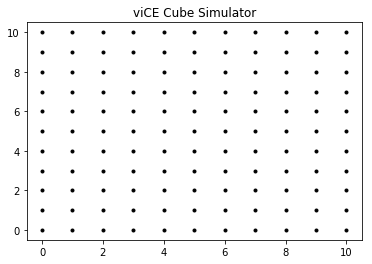

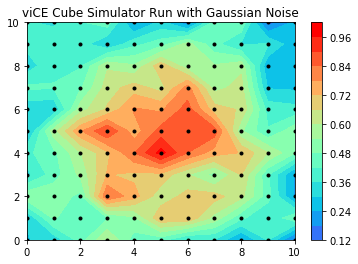

x y angle energy time
5.058938652363811 4.5576592663127515 3.2158288827273362 0.3995132209043476 71
charge
 [[0.29646058 0.31988332 0.44880508 0.60074807 0.45293224 0.4444641
  0.34654142 0.35912427 0.22965994 0.36466334 0.15134855]
 [0.30399085 0.48846022 0.42174334 0.47386051 0.52766692 0.7118733
  0.71233566 0.57843042 0.43245464 0.36324416 0.46673431]
 [0.52610625 0.52302119 0.4608104  0.83823814 0.74424138 0.61978333
  0.68406523 0.68739875 0.61864911 0.44299102 0.22934394]
 [0.3396949  0.45196536 0.55415026 0.72343099 0.70496872 0.70397091
  0.60353129 0.51540989 0.66339657 0.42771713 0.23144053]
 [0.40552014 0.4619958  0.59598029 0.70599535 0.83608133 0.9848291
  0.84038359 0.75135585 0.71561039 0.59963183 0.48517914]
 [0.27530043 0.57263147 0.77119618 0.90231662 0.74653272 0.86433599
  0.8672767  0.87296219 0.54970009 0.42561233 0.52085994]
 [0.31489083 0.30685786 0.57368046 0.66832167 0.78696081 0.76867537
  0.86622397 0.68630115 0.65296806 0.39672803 0.38100724]
 [0.43267054 

In [9]:
exampleRun()

In [9]:
def inputFunction(dataSize, sigma):
    trainVec, trainLabel = createTrainingVector(dataSize, sigma)    
    features = {'x' : trainVec}
    #trainLabel is the output. which currently is the origin
    labels = trainLabel
    #labels = np.int(labels)
    
    
    return features, labels


In [10]:
#returns MSE
def evaluateModel(DNNRegressor, inputFn):
    #evaluating accuracy
    evalReg = DNNRegressor.evaluate(input_fn = inputFn)
    print("\n\nTest Accuracy=",evalReg)

    # The evaluation returns a Python dictionary. The "average_loss" key holds the
    # Mean Squared Error (MSE).    
    return evalReg["average_loss"]

In [11]:
#function returns predictions
def predict(DNNRegressor, predictFeatures,predictLabels):
    predict_input_fn = tf.estimator.inputs.numpy_input_fn(
            x=predictFeatures,
            num_epochs=1,
            shuffle=False)
    
    predictions = list(DNNRegressor.predict(input_fn=predict_input_fn))
    predicted_classes = [p["predictions"] for p in predictions]
    predicted_classes = np.array(predicted_classes)

    print("Predictions\n", predicted_classes)
    
    print("Labels\n", predictLabels)
    
    #converting to Tensor, not necessary but was going to use it for a function that required tensors.
    """
    lab = tf.convert_to_tensor(
        new_samples_labels,
        dtype=None,
        name=None,
        preferred_dtype=None)
    #

    pred = tf.convert_to_tensor(
        predicted_classes,
        dtype=None,
        name=None,
        preferred_dtype=None)
    print(type(lab))
    print(type(lab.dtype))
    print(type(pred))
    print(type(pred.dtype))
    """
    return predicted_classes

In [22]:
acc = np.zeros((40),dtype = np.float32)
sig = np.arange(0.0, 2.0, 0.05)
for i in range(40):
    trainSize = 4500
    #testSize = 4000

    trainFeatures, trainLabels = inputFunction(trainSize, sig[i])
    #testFeatures, testLabels = inputFunction(testSize, 3)

    #train input fn
    train_input_fn = tf.estimator.inputs.numpy_input_fn(x=(trainFeatures),
                                                        y=(trainLabels),
                                                        num_epochs=None,
                                                        shuffle=True)
    #train input fn
    train_input_fn_test = tf.estimator.inputs.numpy_input_fn(x=(trainFeatures),
                                                        y=(trainLabels),
                                                        num_epochs=1,
                                                        shuffle=False)


    #test input fn
    #test_input_fn = tf.estimator.inputs.numpy_input_fn(x=(testFeatures),
    #                                                   y=(testLabels),
    #                                                   num_epochs=1,
    #                                                   shuffle=False)
    
    #defining feature columns
    my_feature_columns = []
    print("feature_columns=",my_feature_columns)

    # Specify that all features have real-value data
    my_feature_columns = [tf.feature_column.numeric_column("x", shape=[121])]


    # Build 3 layer DNN Regressor with 10, 20, 10 units respectively. With 2D labels (x,y)
    regressor = tf.estimator.DNNRegressor(feature_columns=my_feature_columns,
                                          label_dimension = 2,
                                          hidden_units= [10,20,10])

    regressor.train(input_fn=train_input_fn, steps=2000)
    
    acc[i] = evaluateModel(regressor, train_input_fn_test)



feature_columns= []
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmpxyhoujmo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb1ee14860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 i

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmpunyf00fo/model.ckpt.
INFO:tensorflow:loss = 8144.139, step = 1
INFO:tensorflow:global_step/sec: 626.711
INFO:tensorflow:loss = 68.201675, step = 101 (0.160 sec)
INFO:tensorflow:global_step/sec: 979.989
INFO:tensorflow:loss = 77.08232, step = 201 (0.102 sec)
INFO:tensorflow:global_step/sec: 987.109
INFO:tensorflow:loss = 51.080482, step = 301 (0.102 sec)
INFO:tensorflow:global_step/sec: 885.347
INFO:tensorflow:loss = 33.647095, step = 401 (0.113 sec)
INFO:tensorflow:global_step/sec: 990.765
INFO:tensorflow:loss = 46.245495, step = 501 (0.101 sec)
INFO:tensorflow:global_step/sec: 917.299
INFO:tensorflow:loss = 25.832092, step = 601 (0.109 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 655.827
INFO:tensorflow:loss = 190.11063, step = 101 (0.153 sec)
INFO:tensorflow:global_step/sec: 878.85
INFO:tensorflow:loss = 137.57039, step = 201 (0.114 sec)
INFO:tensorflow:global_step/sec: 882.924
INFO:tensorflow:loss = 97.564514, step = 301 (0.113 sec)
INFO:tensorflow:global_step/sec: 984.031
INFO:tensorflow:loss = 126.87909, step = 401 (0.102 sec)
INFO:tensorflow:global_step/sec: 1007.09
INFO:tensorflow:loss = 118.95337, step = 501 (0.100 sec)
INFO:tensorflow:global_step/sec: 880.219
INFO:tensorflow:loss = 105.867325, step = 601 (0.113 sec)
INFO:tensorflow:global_step/sec: 909.579
INFO:tensorflow:loss = 89.16313, step = 701 (0.110 sec)
INFO:tensorflow:global_step/sec: 883.69
INFO:tensorflow:loss = 96.51613, step = 801 (0.113 sec)
INFO:tensorflow:global_step/sec: 943.957
INFO:tensorflow:loss = 72.3217, step = 901 (0.106 sec)
INFO:tensorflow:global_step/sec: 932.097
INFO:tensorflow:loss = 75.16351, step = 1001 (0.108 sec)
INFO:tensorflow:global_st

INFO:tensorflow:global_step/sec: 909.729
INFO:tensorflow:loss = 108.90494, step = 501 (0.110 sec)
INFO:tensorflow:global_step/sec: 856.582
INFO:tensorflow:loss = 136.33154, step = 601 (0.117 sec)
INFO:tensorflow:global_step/sec: 894.806
INFO:tensorflow:loss = 108.82392, step = 701 (0.112 sec)
INFO:tensorflow:global_step/sec: 905.651
INFO:tensorflow:loss = 128.941, step = 801 (0.110 sec)
INFO:tensorflow:global_step/sec: 914.336
INFO:tensorflow:loss = 140.28947, step = 901 (0.110 sec)
INFO:tensorflow:global_step/sec: 891.195
INFO:tensorflow:loss = 119.741005, step = 1001 (0.112 sec)
INFO:tensorflow:global_step/sec: 926.001
INFO:tensorflow:loss = 119.178215, step = 1101 (0.108 sec)
INFO:tensorflow:global_step/sec: 1017.38
INFO:tensorflow:loss = 124.01466, step = 1201 (0.099 sec)
INFO:tensorflow:global_step/sec: 898.319
INFO:tensorflow:loss = 101.67699, step = 1301 (0.111 sec)
INFO:tensorflow:global_step/sec: 965.355
INFO:tensorflow:loss = 95.56946, step = 1401 (0.104 sec)
INFO:tensorflow:

INFO:tensorflow:global_step/sec: 909.825
INFO:tensorflow:loss = 176.79976, step = 901 (0.110 sec)
INFO:tensorflow:global_step/sec: 904.161
INFO:tensorflow:loss = 186.33919, step = 1001 (0.111 sec)
INFO:tensorflow:global_step/sec: 940.37
INFO:tensorflow:loss = 169.52579, step = 1101 (0.107 sec)
INFO:tensorflow:global_step/sec: 957.744
INFO:tensorflow:loss = 173.05646, step = 1201 (0.105 sec)
INFO:tensorflow:global_step/sec: 955.886
INFO:tensorflow:loss = 169.06705, step = 1301 (0.105 sec)
INFO:tensorflow:global_step/sec: 896.395
INFO:tensorflow:loss = 137.97208, step = 1401 (0.111 sec)
INFO:tensorflow:global_step/sec: 989.169
INFO:tensorflow:loss = 157.37984, step = 1501 (0.101 sec)
INFO:tensorflow:global_step/sec: 880.995
INFO:tensorflow:loss = 149.6117, step = 1601 (0.113 sec)
INFO:tensorflow:global_step/sec: 954.418
INFO:tensorflow:loss = 132.89497, step = 1701 (0.105 sec)
INFO:tensorflow:global_step/sec: 952.472
INFO:tensorflow:loss = 112.79022, step = 1801 (0.105 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 748.638
INFO:tensorflow:loss = 201.70697, step = 1301 (0.134 sec)
INFO:tensorflow:global_step/sec: 825.506
INFO:tensorflow:loss = 205.16916, step = 1401 (0.121 sec)
INFO:tensorflow:global_step/sec: 879.637
INFO:tensorflow:loss = 192.37349, step = 1501 (0.114 sec)
INFO:tensorflow:global_step/sec: 979.25
INFO:tensorflow:loss = 175.22084, step = 1601 (0.102 sec)
INFO:tensorflow:global_step/sec: 885.302
INFO:tensorflow:loss = 193.44409, step = 1701 (0.113 sec)
INFO:tensorflow:global_step/sec: 941.21
INFO:tensorflow:loss = 196.25897, step = 1801 (0.107 sec)
INFO:tensorflow:global_step/sec: 955.86
INFO:tensorflow:loss = 179.01523, step = 1901 (0.105 sec)
INFO:tensorflow:Saving checkpoints for 2000 into /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmprse14aod/model.ckpt.
INFO:tensorflow:Loss for final step: 181.9458.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-18-18:37:46
INFO:tens

INFO:tensorflow:global_step/sec: 1014.08
INFO:tensorflow:loss = 258.46063, step = 1701 (0.098 sec)
INFO:tensorflow:global_step/sec: 963.065
INFO:tensorflow:loss = 256.16595, step = 1801 (0.104 sec)
INFO:tensorflow:global_step/sec: 941.292
INFO:tensorflow:loss = 275.17688, step = 1901 (0.106 sec)
INFO:tensorflow:Saving checkpoints for 2000 into /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmpmz6f7iw5/model.ckpt.
INFO:tensorflow:Loss for final step: 306.79446.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-18-18:37:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmpmz6f7iw5/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-18-18:37:54
INFO:tensorflow:Saving dict for global step 2000: average_loss = 0.9432905, global_step = 2000, loss = 

INFO:tensorflow:Loss for final step: 280.815.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-18-18:38:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmpv4cqle8o/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-18-18:38:02
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.142015, global_step = 2000, loss = 285.50375


Test Accuracy= {'average_loss': 1.142015, 'loss': 285.50375, 'global_step': 2000}
feature_columns= []
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmp3o4b64rc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_m

INFO:tensorflow:Finished evaluation at 2018-07-18-18:38:10
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.4028448, global_step = 2000, loss = 350.7112


Test Accuracy= {'average_loss': 1.4028448, 'loss': 350.7112, 'global_step': 2000}
feature_columns= []
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmpla7j6wi2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb2ad516d8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling 

INFO:tensorflow:Using config: {'_model_dir': '/var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmppgxtfswh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb1f240160>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmppg

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmpuyycc8q8/model.ckpt.
INFO:tensorflow:loss = 7936.824, step = 1
INFO:tensorflow:global_step/sec: 614.269
INFO:tensorflow:loss = 957.75037, step = 101 (0.164 sec)
INFO:tensorflow:global_step/sec: 1011.08
INFO:tensorflow:loss = 767.72, step = 201 (0.099 sec)
INFO:tensorflow:global_step/sec: 935.418
INFO:tensorflow:loss = 677.45465, step = 301 (0.107 sec)
INFO:tensorflow:global_step/sec: 908.786
INFO:tensorflow:loss = 705.9125, step = 401 (0.110 sec)
INFO:tensorflow:global_step/sec: 1018.04
INFO:tensorflow:loss = 696.4541, step = 501 (0.099 sec)
INFO:tensorflow:global_step/sec: 936.337
INFO:tensorflow:loss = 603.6122, step = 601 (0.107 sec)
INFO:tensorflow:glob

INFO:tensorflow:loss = 1143.63, step = 101 (0.201 sec)
INFO:tensorflow:global_step/sec: 682.706
INFO:tensorflow:loss = 805.4872, step = 201 (0.147 sec)
INFO:tensorflow:global_step/sec: 674.076
INFO:tensorflow:loss = 822.2317, step = 301 (0.147 sec)
INFO:tensorflow:global_step/sec: 880.538
INFO:tensorflow:loss = 869.8955, step = 401 (0.114 sec)
INFO:tensorflow:global_step/sec: 807.924
INFO:tensorflow:loss = 813.1968, step = 501 (0.124 sec)
INFO:tensorflow:global_step/sec: 734.873
INFO:tensorflow:loss = 778.2017, step = 601 (0.136 sec)
INFO:tensorflow:global_step/sec: 770.945
INFO:tensorflow:loss = 651.60767, step = 701 (0.129 sec)
INFO:tensorflow:global_step/sec: 975.503
INFO:tensorflow:loss = 734.79956, step = 801 (0.103 sec)
INFO:tensorflow:global_step/sec: 896.435
INFO:tensorflow:loss = 642.2662, step = 901 (0.112 sec)
INFO:tensorflow:global_step/sec: 852.827
INFO:tensorflow:loss = 634.0993, step = 1001 (0.117 sec)
INFO:tensorflow:global_step/sec: 861.446
INFO:tensorflow:loss = 537.9

INFO:tensorflow:global_step/sec: 906.009
INFO:tensorflow:loss = 883.18066, step = 601 (0.111 sec)
INFO:tensorflow:global_step/sec: 907.343
INFO:tensorflow:loss = 910.1869, step = 701 (0.110 sec)
INFO:tensorflow:global_step/sec: 985.911
INFO:tensorflow:loss = 801.8328, step = 801 (0.102 sec)
INFO:tensorflow:global_step/sec: 931.55
INFO:tensorflow:loss = 803.4583, step = 901 (0.107 sec)
INFO:tensorflow:global_step/sec: 929.688
INFO:tensorflow:loss = 796.02905, step = 1001 (0.108 sec)
INFO:tensorflow:global_step/sec: 1009.27
INFO:tensorflow:loss = 826.4444, step = 1101 (0.099 sec)
INFO:tensorflow:global_step/sec: 921.947
INFO:tensorflow:loss = 718.86743, step = 1201 (0.108 sec)
INFO:tensorflow:global_step/sec: 942.587
INFO:tensorflow:loss = 700.8485, step = 1301 (0.106 sec)
INFO:tensorflow:global_step/sec: 907.813
INFO:tensorflow:loss = 787.34595, step = 1401 (0.110 sec)
INFO:tensorflow:global_step/sec: 989.267
INFO:tensorflow:loss = 869.3239, step = 1501 (0.101 sec)
INFO:tensorflow:globa

INFO:tensorflow:loss = 870.1597, step = 1001 (0.101 sec)
INFO:tensorflow:global_step/sec: 970.073
INFO:tensorflow:loss = 879.39545, step = 1101 (0.103 sec)
INFO:tensorflow:global_step/sec: 1008.16
INFO:tensorflow:loss = 755.8308, step = 1201 (0.099 sec)
INFO:tensorflow:global_step/sec: 919.124
INFO:tensorflow:loss = 889.8247, step = 1301 (0.108 sec)
INFO:tensorflow:global_step/sec: 1005.28
INFO:tensorflow:loss = 697.7661, step = 1401 (0.100 sec)
INFO:tensorflow:global_step/sec: 951.275
INFO:tensorflow:loss = 869.3341, step = 1501 (0.105 sec)
INFO:tensorflow:global_step/sec: 959.529
INFO:tensorflow:loss = 626.7731, step = 1601 (0.105 sec)
INFO:tensorflow:global_step/sec: 918.915
INFO:tensorflow:loss = 825.7007, step = 1701 (0.108 sec)
INFO:tensorflow:global_step/sec: 969.943
INFO:tensorflow:loss = 795.34045, step = 1801 (0.103 sec)
INFO:tensorflow:global_step/sec: 1010.22
INFO:tensorflow:loss = 758.24133, step = 1901 (0.099 sec)
INFO:tensorflow:Saving checkpoints for 2000 into /var/fold

INFO:tensorflow:global_step/sec: 786.394
INFO:tensorflow:loss = 955.6522, step = 1501 (0.127 sec)
INFO:tensorflow:global_step/sec: 1010.44
INFO:tensorflow:loss = 798.5286, step = 1601 (0.099 sec)
INFO:tensorflow:global_step/sec: 971.891
INFO:tensorflow:loss = 838.77, step = 1701 (0.103 sec)
INFO:tensorflow:global_step/sec: 883.698
INFO:tensorflow:loss = 851.5993, step = 1801 (0.113 sec)
INFO:tensorflow:global_step/sec: 959.665
INFO:tensorflow:loss = 939.7218, step = 1901 (0.105 sec)
INFO:tensorflow:Saving checkpoints for 2000 into /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmpkksqkfae/model.ckpt.
INFO:tensorflow:Loss for final step: 834.63776.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-18-18:39:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmpkksqkfae/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow

INFO:tensorflow:global_step/sec: 917.972
INFO:tensorflow:loss = 925.44196, step = 1901 (0.109 sec)
INFO:tensorflow:Saving checkpoints for 2000 into /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmpo1n5i4ii/model.ckpt.
INFO:tensorflow:Loss for final step: 922.99347.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-18-18:39:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmpo1n5i4ii/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-18-18:39:13
INFO:tensorflow:Saving dict for global step 2000: average_loss = 3.5578392, global_step = 2000, loss = 889.4598


Test Accuracy= {'average_loss': 3.5578392, 'loss': 889.4598, 'global_step': 2000}
feature_columns= []
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmp6pdhlsei/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-18-18:39:21
INFO:tensorflow:Saving dict for global step 2000: average_loss = 3.567036, global_step = 2000, loss = 891.759


Test Accuracy= {'average_loss': 3.567036, 'loss': 891.759, 'global_step': 2000}
feature_columns= []
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmp393bl18x', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.Cl



Test Accuracy= {'average_loss': 3.9607894, 'loss': 990.1974, 'global_step': 2000}
feature_columns= []
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmpfdi6zvap', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb1f240470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
IN

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmpc0bstf_l/model.ckpt.
INFO:tensorflow:loss = 8261.44, step = 1
INFO:tensorflow:global_step/sec: 655.454
INFO:tensorflow:loss = 1649.5188, step = 101 (0.154 sec)
INFO:tensorflow:global_step/sec: 964.248
INFO:tensorflow:loss = 1492.8608, step = 201 (0.103 sec)
INFO:tensorflow:global_step/sec: 924.837
INFO:tensorflow:loss = 1379.3318, step = 301 (0.108 sec)
INFO:tensorflow:global_step/sec: 1009.03
INFO:tensorflow:loss = 1254.887, step = 401 (0.099 sec)
INFO:tensorflow:global_step/sec: 968.814
INFO:tensorflow:loss = 1177.4965, step = 501 (0.103 sec)
INFO:tensorflow:global_step/sec: 922.449
INFO:tensorflow:loss = 1344.8877, step = 601 (0.108 sec)
INFO:tensorflow:

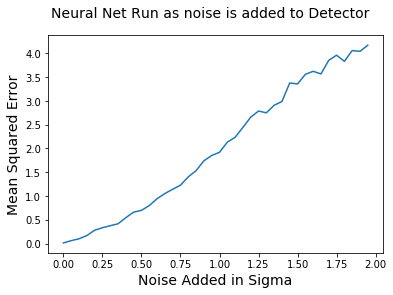

In [26]:
fig = plt.figure()
plt.plot(sig,acc)
fig.suptitle('Neural Net Run as noise is added to Detector', fontsize=14)
plt.xlabel('Noise Added in Sigma', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.yticks(np.arange(0, 4.5, 0.5))
fig.savefig('test.jpg')


In [16]:
trainSize = 45000
testSize = 4000

trainFeatures, trainLabels = inputFunction(trainSize, 3)
testFeatures, testLabels = inputFunction(testSize, 3)

print((trainFeatures['x'].dtype))
print(trainLabels.dtype)
print(trainFeatures['x'].shape)
print(trainLabels.shape)

#train input fn
train_input_fn = tf.estimator.inputs.numpy_input_fn(x=(trainFeatures),
                                                    y=(trainLabels),
                                                    num_epochs=None,
                                                    shuffle=True)
#train input fn
train_input_fn_test = tf.estimator.inputs.numpy_input_fn(x=(trainFeatures),
                                                    y=(trainLabels),
                                                    num_epochs=1,
                                                    shuffle=False)


#test input fn
test_input_fn = tf.estimator.inputs.numpy_input_fn(x=(testFeatures),
                                                   y=(testLabels),
                                                   num_epochs=1,
                                                   shuffle=False)
#defining feature columns
my_feature_columns = []
print("feature_columns=",my_feature_columns)

# Specify that all features have real-value data
my_feature_columns = [tf.feature_column.numeric_column("x", shape=[121])]


# Build 3 layer DNN Regressor with 10, 20, 10 units respectively. With 2D labels (x,y)
regressor = tf.estimator.DNNRegressor(feature_columns=my_feature_columns,
                                      label_dimension = 2,
                                      hidden_units= [10,20,10])

float32
float32
(45000, 121)
(45000, 2)
feature_columns= []
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmprd5w4s91', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10a8e5710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [18]:
#Training regressor
regressor.train(input_fn=train_input_fn, steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmprd5w4s91/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2001 into /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmprd5w4s91/model.ckpt.
INFO:tensorflow:loss = 1698.824, step = 2001
INFO:tensorflow:global_step/sec: 617.559
INFO:tensorflow:loss = 1701.7051, step = 2101 (0.163 sec)
INFO:tensorflow:global_step/sec: 903.52
INFO:tensorflow:loss = 1607.5537, step = 2201 (0.110 sec)
INFO:tensorflow:global_step/sec: 900.245
INFO:tensorflow:loss = 1677.1796, step = 2301 (0.111 sec)
INFO:tensorflow:global_step/sec: 882.456
INFO:tensorflow:loss = 1605.1826, step = 2401 (0.113 sec)
INFO:tensorflow:global_step/sec: 913.042
INFO:tensorflow:loss = 1512.0692, step = 

In [19]:
#Evalutating regressor
train_accuracy = evaluateModel(regressor, train_input_fn_test)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-18-18:12:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmprd5w4s91/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-18-18:12:10
INFO:tensorflow:Saving dict for global step 4000: average_loss = 6.678748, global_step = 4000, loss = 1707.6344


Test Accuracy= {'average_loss': 6.678748, 'loss': 1707.6344, 'global_step': 4000}


In [20]:
#Evalutating regressor
accuracy = (evaluateModel(regressor, test_input_fn))
print(type(accuracy))
print(accuracy)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-18-18:02:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/gn/y5s233mx34b21b029nk5sc3h0000gn/T/tmpd8c0ksui/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-18-18:02:46
INFO:tensorflow:Saving dict for global step 2000: average_loss = 2.3968236, global_step = 2000, loss = 599.20593


Test Accuracy= {'average_loss': 2.3968236, 'loss': 599.20593, 'global_step': 2000}
<class 'numpy.float32'>
2.3968236


In [31]:
#predicting model
#predictSize = 8
#predictFeatures,predictLabels = inputFunction(predictSize)
#predictions = predict(regressor, predictFeatures,predictLabels)

TypeError: inputFunction() missing 1 required positional argument: 'sigma'

In [ ]:
!tensorboard --logdir=path/to/tmp/cube_model

In [ ]:
for 

In [20]:
print(sig)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]
